# Dimensionality reduction techniques

### In general, the more dimensions a training set has, the greater the risk of overfitting it.

# Concepts
## Projection
### Projection discusses how data is not spread out uniformly across all dimensions. In real world data, think industrial operations, many features are almost constant, whereas, others are highly correlated. As a result, all training instances actually lie within a lower-dimensional subscape of the high-dimensional space.

## Manifold Learning
### Manifold Learning discusses a real world assumption. This assumption is that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold.

### This assumption is coupled with the assumption that the task at hand (think of classification or regression) will be simpler if it is expressed with a lower dimensional subspace

In [1]:
# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

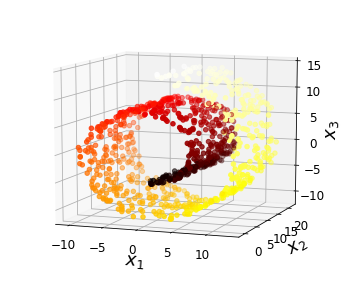

In [2]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
from mpl_toolkits.mplot3d import Axes3D
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()


### Looking at this figure above, it would be extremely hard to create a decision boundary for this 3D dataset utilizing the 3D space. However, utilizing a 2D space, it is much simpler.

### However, this does not always hold. In summary, dimensionality reduction will speed up training. But it may not always lead to a better, or simpler solution - that depends on the data.

# Types of Dimensionality Reduction

# 1. Principal Component Analysis - PCA

### PCA is a very popular dim. reduction technique. It identifies the hyperplane that lies closest to the data and then projects the data onto it. 
##### For a cross comparison example, think back to when you utilized PCA for the hockey analytics course project in ChE 694

### For projection axis, we select the axis that preserves the maximum amount of variance, as it will retain the most information (meaning, we lose the least amount of information). Compared to other projections

#### Another simply put way, minimize the mean squared distance between the original dataset and its projection

### For PCA, we label principal components PC's as each axis. i.e. the first axis transformation is the 1st PC, 2nd 2nd PC, and so-on. As many PC's as dimensions in the dataset.

## In order to obtain principal components, we may use singular value decomposition SVD.

#### For current research, we utilize SVD often to perform calculations.

In [3]:
import numpy as np

In [4]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [5]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

## NOTE: Recall it's crucial to center our data in PCA first before performing calculations.

## Projecting our training data set onto the plane defined by the first two PC's

In [6]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

# Using Scikit-Learn

### Note: Utilizing sklearn for PCA automatically centers our data.

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [9]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [10]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

### Explained variance tells you the proportion of the dataset's variance that lies along the axis of each PC

#### In this example, only 1.2% lies on the 3rd axis, so it is reasonable to assume that it carries little information and can be withdrawn from the data.

### Choosing the proper number of dimensions for each task. 
#### Create a criterion and run with it. i.e. 95%

In [11]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [13]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [14]:
X_reduced

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049],
       [-1.10436914,  0.20204953],
       [ 1.27265808,  0.46781247],
       [-0.44933007,  0.67736663],
       [-1.09356195, -0.04467792],
       [-0.66177325, -0.28651264],
       [ 1.04466138, -0.11244353],
       [-1.05932502,  0.31189109],
       [ 1.13761426,  0.14576655],
       [ 1.16044117,  0.36481599],
       [-1.00167625,  0.39422008],
       [ 0.2750406 , -0.34391089],
       [-0.45624787,  0.69707573],
       [-0.79706574, -0.26870969],
       [-0.66924929,  0.65520024],
       [ 1.30679728,  0.37671343],
       [-0.6626586 , -0.32706423],
       [ 1.25387588,  0.56043928],
       [ 1.04046987, -0.08727672],
       [ 1.26047729,  0.1571074 ],
       [-1.09786649,  0.38643428],
       [-0.7130973 ,  0.64941523],
       [ 0.17786909, -0.43609071],
       [-1.02975735,  0.33747452],
       [ 0.94552283,

In [15]:
X

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496],
       [ 1.11816122,  0.32508721,  0.31710572],
       [-1.02258878, -0.64384064, -0.13368695],
       [ 0.67351984, -0.27342519, -0.00787835],
       [ 1.01619558,  0.51546608,  0.46783297],
       [ 0.54957723,  0.67728016,  0.2340159 ],
       [-0.98960443,  0.00886617, -0.12152034],
       [ 1.13248106,  0.28229967,  0.06972972],
       [-0.99337712, -0.26832824, -0.15761101],
       [-0.94763679, -0.4995849 , -0.13927911],
       [ 1.10095709,  0.1706481 ,  0.09790432],
       [-0.34604591,  0.45334414,  0.06433843],
       [ 0.69102621, -0.27337761, -0.05926516],
       [ 0.68302902,  0.70421846,  0.24642318],
       [ 0.8774031 , -0.16775101, -0.02162333],
       [-1.06090127, -0.48213721, -0.38573526],
       [ 0.52336644,  0.66585845,  0.390

## We can see that this automatically takes care of reducing down our dimensionality in PCA.

### After dimensionality reduction, it is possible for us to easily reproduce our original dimension utilizing the reverse transformations

##### It is noted some original bits of information will be lost, but it will likely be close to the original data.

### MSE between original data and reconstructed data is called the 
# Reconstruction error

In [16]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"[:50000]], mnist["target"[:50000]]

/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
shuffle_index=np.random.permutation(50000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [18]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

# Plotting the Original data and compressed

In [19]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

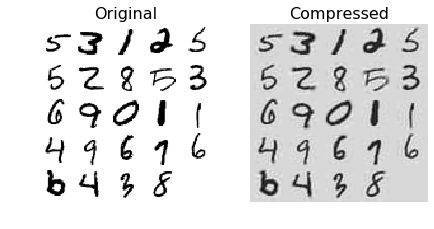

In [20]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

## As we can see, there is a slightl image quality loss, but the digits are intact.

In [21]:
print(pca.explained_variance_ratio_)  

[0.09819662 0.07129864 0.06116563 0.05423728 0.04911701 0.04315458
 0.03269258 0.02895983 0.02764071 0.02333263 0.02104623 0.02043533
 0.01706902 0.0170014  0.01580807 0.01485493 0.01313819 0.01281843
 0.01186812 0.01144515 0.01060321 0.01014989 0.00958902 0.00912388
 0.00880307 0.00836311 0.00807893 0.00781973 0.00736298 0.00690277
 0.00656177 0.00643109 0.00601858 0.00584552 0.00568524 0.00540366
 0.00502882 0.00484406 0.00480267 0.00465793 0.00454846 0.00442947
 0.00417621 0.00393468 0.00385168 0.00376302 0.00360477 0.00347504
 0.00339032 0.00321553 0.00315345 0.00309699 0.00296328 0.00287092
 0.00282177 0.00269168 0.00267692 0.0025815  0.00253482 0.00245206
 0.00239123 0.00237588 0.00227971 0.00220402 0.00213387 0.00206461
 0.0020317  0.00193359 0.00191224 0.00189158 0.0018643  0.00180259
 0.00177104 0.00172861 0.00164318 0.0016213  0.00161712 0.00154042
 0.00147162 0.00141634 0.00141347 0.00140197 0.0013939  0.00134067
 0.00133008 0.00130706 0.00128961 0.0012525  0.00121061 0.0012

## Let's decrease the dimensionality even more

In [22]:
pca = PCA(n_components = 75)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

Text(0.5, 1.0, 'Further compressed')

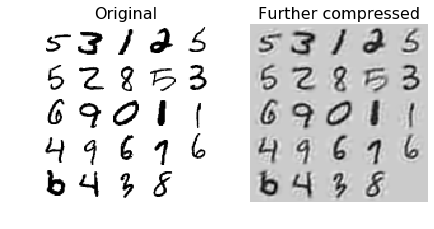

In [23]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Further compressed", fontsize=16)

## Even at only 75 components, less than half of the components as before, we maintain an 'okay' level of information to the components

## As PCA requires the entire dataset to fit in the memory of the computer, we may utilize incremental PCA to split the training set into smaller sets and solve SVD accordingly

In [24]:
from sklearn.decomposition import IncrementalPCA

In [25]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

### Utilizing numpy is an additional option, can hold entire dataset for fit.

In [28]:
filename = "my_mnist.data"
m, n = X_train.shape
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size = batch_size)
inc_pca.fit(X_mm)



/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/incremental_pca.py:282: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio = S ** 2 / np.sum(col_var * n_total_samples)


IncrementalPCA(batch_size=500, copy=True, n_components=154, whiten=False)

In [30]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/incremental_pca.py:282: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio = S ** 2 / np.sum(col_var * n_total_samples)


IncrementalPCA(batch_size=500, copy=True, n_components=154, whiten=False)

## Randomized PCA. Dramatically faster than other options when d is much smaller than n.

Text(0.5, 1.0, 'Compressed with Randomized PCA')

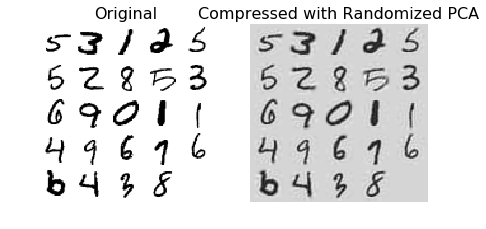

In [34]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)
X_recovered = rnd_pca.inverse_transform(X_reduced)
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed with Randomized PCA", fontsize=16)

# Kernel Trick for PCA (support vector machines)

In [35]:
from sklearn.decomposition import KernelPCA

In [36]:
rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma=0.04)

In [37]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [38]:
X_reduced = rbf_pca.fit_transform(X)

### kPCA is an unsupervised learning algorithm and alas, has no way to find the optimal hyperparameter or kernel values.

## We may create a pipeline that allows us to firstly do dimensionality reduction, then secondly perform classification utilizing logistic regression (0/1)

### Utilize GridSearchCV after to find the optimal hyperparameter values and kernel.

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [43]:
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression(random_state=30))
])

In [50]:
param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

In [51]:
grid_search = GridSearchCV(clf, param_grid, cv=3)

In [54]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
y = t > 6.9

In [55]:
grid_search.fit(X, y)

/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRe..., penalty='l2', random_state=30, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kpca__gamma': array([0.03   , 0.03222, 0.03444, 0.03667, 0.03889, 0.04111, 0.04333,
       0.04556, 0.04778, 0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


## Another strategy is to go entirely unsupervised - pick the kernel and hyperparameters that yield the lowest reconstruction error. 

### The trick is to train a supervised reg. model with the projected instances and then use the original instances as the targets.

## In order to do so we must set fit_inverse_transform=True

In [57]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)

In [58]:
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

## Then recompute the reconstruction pre-image error:

In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

32.7863087957661

# Locally Linear Embedding LLE

## LLE is a powerful non-linear dim. reduction technique. It utilizes manifold learning that does not rely on projections, unlike PCA.
### LLE Looks at relationships in distance to points and their closest neighbours. It then acts to look for a low-dimensional representation of the training set that preserves these relationships.

# It is particularly effective at unrolling twisted manifolds without noise.

In [61]:
from sklearn.manifold import LocallyLinearEmbedding

In [62]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

In [63]:
X_reduced = lle.fit_transform(X)

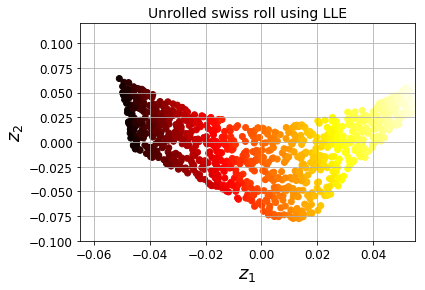

In [64]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()